# Step 1: Exploration

### Determine how many zipcodes are represented

Steps taken below: Read in csv file using pandas, creating a dataframe. Examine the first five rows of the DataFrame. Use the aggregate method to sum and return the number of unique zip codes

In [1]:
import pandas as pd

In [2]:
tree_df = pd.read_csv('Street_Tree_List.csv')

In [3]:
tree_df.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,...,XCoord,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old)
0,121399,DPW Maintained,Corymbia ficifolia :: Red Flowering Gum,349X Cargo Way,1.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46536,Permitted Site,Tree(s) ::,73 Summer St,2.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,04/01/2002 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,251210,DPW Maintained,Eucalyptus polyanthemos :: Silver Dollar Eucal...,1170 Ingalls St,2.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,11/02/1992 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,254457,Significant Tree,Dodonaea viscosa :: Hop Bush,1055X Duncan St,2.0,Side Yard : Yard,Tree,Private,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,255073,Private,Tree(s) ::,173R Glenview Dr,NaN,Back Yard : Yard,Tree,Private,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
zipcode_counts = tree_df.agg({'Zip Codes': 'nunique'})
zipcode_counts

Zip Codes    29
dtype: int64

### Determine how many total trees there are
Steps taken below: Examine the DataFrame head. Use the pandas count method on the tree id column (a series) as each tree will have an id

In [5]:
tree_df.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,...,XCoord,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old)
0,121399,DPW Maintained,Corymbia ficifolia :: Red Flowering Gum,349X Cargo Way,1.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46536,Permitted Site,Tree(s) ::,73 Summer St,2.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,04/01/2002 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,251210,DPW Maintained,Eucalyptus polyanthemos :: Silver Dollar Eucal...,1170 Ingalls St,2.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,11/02/1992 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,254457,Significant Tree,Dodonaea viscosa :: Hop Bush,1055X Duncan St,2.0,Side Yard : Yard,Tree,Private,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,255073,Private,Tree(s) ::,173R Glenview Dr,NaN,Back Yard : Yard,Tree,Private,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
tree_df['TreeID'].count()

195761

### Determine the various formats for plot size dimensions
Steps taken below: Examine the first five entries of the DataFrame (columns 9 through end to see the PlotSize column). Check the type of the PlotSize column. Use the value counts method to see all the plot size formats and how many rows have them.

In [7]:
tree_df.iloc[:, 9:].head()

,PlantDate,DBH,PlotSize,PermitNotes,XCoord,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/01/2002 12:00:00 AM,NaN,NaN,Permit Number 44686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/02/1992 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
tree_df['PlotSize'].dtypes

dtype('O')

In [9]:
tree_df['PlotSize'].value_counts()

Width 3ft    36613
3x3          30369
Width 0ft    17195
Width 4ft    13852
3X3          12091
             ...  
8x1              1
.75X.75          1
4.5x4            1
3.5x3. 5         1
40TR             1
Name: PlotSize, Length: 601, dtype: int64

### Determine the different Site information options
Steps taken below: Examine the head of the DataFrame. Call the unique method on the Site Info column to get all the values in the column

In [10]:
tree_df.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,...,XCoord,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old)
0,121399,DPW Maintained,Corymbia ficifolia :: Red Flowering Gum,349X Cargo Way,1.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46536,Permitted Site,Tree(s) ::,73 Summer St,2.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,04/01/2002 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,251210,DPW Maintained,Eucalyptus polyanthemos :: Silver Dollar Eucal...,1170 Ingalls St,2.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,11/02/1992 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,254457,Significant Tree,Dodonaea viscosa :: Hop Bush,1055X Duncan St,2.0,Side Yard : Yard,Tree,Private,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,255073,Private,Tree(s) ::,173R Glenview Dr,NaN,Back Yard : Yard,Tree,Private,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
tree_df['qSiteInfo'].unique()

array(['Sidewalk: Curb side : Cutout', 'Side Yard : Yard',
       'Back Yard : Yard', 'Sidewalk: Property side : Yard',
       'Median : Yard', 'Unaccepted Street : Yard', 'Front Yard : Yard',
       'Sidewalk: Curb side : Yard', 'Unaccepted Street : Cutout',
       'Median : Cutout', 'Sidewalk: Property side : Cutout',
       'Side Yard : Cutout', 'unknown : Yard', 'Back Yard : Cutout',
       'Sidewalk: Curb side : Pot', 'Sidewalk: Curb side :', 'Median :',
       ':', 'Front Yard : Pot', 'Front Yard : Cutout',
       'Unaccepted Street : Pot', ': Yard', ': Cutout', 'Front Yard :',
       'Sidewalk: Property side : Pot', 'Sidewalk: Property side :',
       'unknown : Cutout', 'Hanging basket : Cutout',
       'Sidewalk: Curb side : Hanging Pot', 'Hanging basket : Yard',
       'unknown : Pot', 'Median : Hanging Pot'], dtype=object)

### Determine whether private or public works is more popular
Steps taken below: Examine the head of the DataFrame. Use the value_counts method on the caretaker column to reveal how many trees have each caretaker option. From those values, determine which is more popular.

In [12]:
tree_df.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,...,XCoord,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old)
0,121399,DPW Maintained,Corymbia ficifolia :: Red Flowering Gum,349X Cargo Way,1.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46536,Permitted Site,Tree(s) ::,73 Summer St,2.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,04/01/2002 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,251210,DPW Maintained,Eucalyptus polyanthemos :: Silver Dollar Eucal...,1170 Ingalls St,2.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,11/02/1992 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,254457,Significant Tree,Dodonaea viscosa :: Hop Bush,1055X Duncan St,2.0,Side Yard : Yard,Tree,Private,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,255073,Private,Tree(s) ::,173R Glenview Dr,NaN,Back Yard : Yard,Tree,Private,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
tree_df['qCaretaker'].value_counts()

Private                    164071
DPW                         27950
SFUSD                        1100
Port                          726
Rec/Park                      722
PUC                           261
DPW for City Agency           210
MTA                           109
Dept of Real Estate            94
Purchasing Dept                85
Housing Authority              73
Fire Dept                      68
Health Dept                    56
Police Dept                    50
Mayor Office of Housing        37
Public Library                 37
Arts Commission                31
Office of Mayor                27
War Memorial                   20
Mission Verde                  15
City College                   11
Asian Arts Commission           6
CAN                             1
Cleary Bros. Landscape          1
Name: qCaretaker, dtype: int64

There are 164071 trees with a private caretaker and 27950 trees with the DPW as caretaker; therefore, private is the more popular option for the caretaker.

### Determine where data is missing
Steps taken below: Examine the head of the DataFrame. Use isna method on dataframe to check which columns are missing data. Use isna and sum methods to count how many values are missing in each column.

In [14]:
tree_df.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,PlantType,qCaretaker,qCareAssistant,PlantDate,...,XCoord,YCoord,Latitude,Longitude,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old)
0,121399,DPW Maintained,Corymbia ficifolia :: Red Flowering Gum,349X Cargo Way,1.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46536,Permitted Site,Tree(s) ::,73 Summer St,2.0,Sidewalk: Curb side : Cutout,Tree,Private,NaN,04/01/2002 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,251210,DPW Maintained,Eucalyptus polyanthemos :: Silver Dollar Eucal...,1170 Ingalls St,2.0,Sidewalk: Curb side : Cutout,Tree,DPW,NaN,11/02/1992 12:00:00 AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,254457,Significant Tree,Dodonaea viscosa :: Hop Bush,1055X Duncan St,2.0,Side Yard : Yard,Tree,Private,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,255073,Private,Tree(s) ::,173R Glenview Dr,NaN,Back Yard : Yard,Tree,Private,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
tree_df.isnull().any()

TreeID                       False
qLegalStatus                  True
qSpecies                     False
qAddress                      True
SiteOrder                     True
qSiteInfo                    False
PlantType                    False
qCaretaker                   False
qCareAssistant                True
PlantDate                     True
DBH                           True
PlotSize                      True
PermitNotes                   True
XCoord                        True
YCoord                        True
Latitude                      True
Longitude                     True
Location                      True
Fire Prevention Districts     True
Police Districts              True
Supervisor Districts          True
Zip Codes                     True
Neighborhoods (old)           True
dtype: bool

18 columns are missing data. Now use the sum method to determine how many values are missing from each column

In [16]:
tree_df.isnull().sum()

TreeID                            0
qLegalStatus                     57
qSpecies                          0
qAddress                       1490
SiteOrder                      1752
qSiteInfo                         0
PlantType                         0
qCaretaker                        0
qCareAssistant               171108
PlantDate                    127406
DBH                           43055
PlotSize                      50329
PermitNotes                  142656
XCoord                         2940
YCoord                         2940
Latitude                       2940
Longitude                      2940
Location                       2940
Fire Prevention Districts      3191
Police Districts               3138
Supervisor Districts           3077
Zip Codes                      3083
Neighborhoods (old)            3081
dtype: int64

# Visualize

### Create a histogram of the number of trees in each zipcode
Steps taken below: import matplotlib inline. Use the hist method from matplotlib to create a histogram, passing in zipcode column with frequency on the y-axis. Label the axes and graph.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002600BDEA880>]],
      dtype=object)

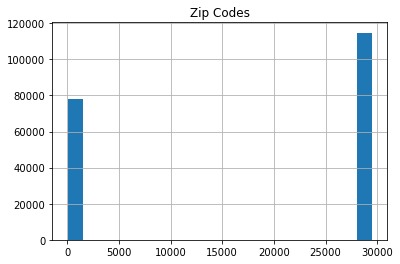

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

tree_df.hist(column='Zip Codes', bins=20)

### Create a histogram of the number of trees cared for by "Private" vs. "DPW"
Steps taken below: Use the hist method from matplotlib to create a histogram, passing in the caretaker column with frequency on the yaxis.

In [18]:
caretakers_list = ['Private', 'DPW']
caretakers_count = [(tree_df['qCaretaker']=='Private').sum(), (tree_df['qCaretaker']=='DPW').sum()]

Text(0, 0.5, 'Number of Trees')

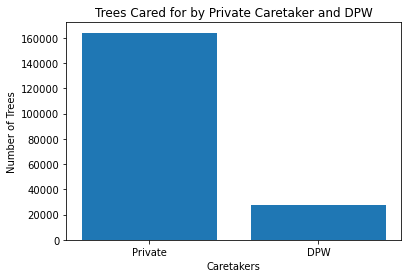

In [19]:
plt.bar(caretakers_list, caretakers_count)
plt.title("Trees Cared for by Private Caretaker and DPW")
plt.xlabel("Caretakers")
plt.ylabel("Number of Trees")